# Check out the latest Keras via TF 1.8

The first hidden layer in the network must define the number of inputs to expect, e.g. the shape of the input layer. Input must be three-dimensional, comprised of samples, time steps, and features in that order.
- Samples. These are the rows in your data. One sample may be one sequence.
- Time steps. These are the past observations for a feature, such as lag variables.
- Features. These are columns in your data.

The choice of activation function is most important for the output layer as it will define the format that predictions will take. For example, below are some common predictive modeling problem types and the structure and standard activation function that you can use in the output layer:
- Regression: Linear activation function, or linear, and the number of neurons matching the number of outputs. This is the default activation function used for neurons in the Dense layer.
- Binary Classification (2 class): Logistic activation function, or sigmoid, and one neuron the output layer.
- Multiclass Classification (> 2 class): Softmax activation function, or softmax, and one output neuron per class value, assuming a one hot encoded output pattern.


The most common optimization algorithms are as follows.
- Stochastic Gradient Descent, or sgd. 
- Adam, or adam.
- RMSprop, or rmsprop.

*These are implementations and variations of projects from Jason Brownlee over at machinelearningmastery.com

In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from numpy import array
n_samples = 1
n_timesteps = 10
n_features = 1
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

data = data.reshape((n_samples, n_timesteps, n_features))
print(data.shape)

/Users/krotovd/anaconda/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/krotovd/anaconda/envs/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


(1, 10, 1)


We can now use the data as such:

model = Sequential()

model.add(LSTM(32, input_shape=(10, 1)))

### Tips for LSTM Input
- The LSTM input layer must be 3D.
- The meaning of the 3 input dimensions are: samples, time steps and features.
- The LSTM input layer is defined by the input shape argument on the first hidden layer.
- The input shape argument takes a tuple of two values that define the number of time steps and features.
- The number of samples is assumed to be 1 or more.
- The reshape() function on NumPy arrays can be used to reshape your 1D or 2D data to
be 3D.
- The reshape() function takes a tuple as an argument that defines the new shape.


### Vanilla LSTM (unstacked LSTM)

In [2]:
from random import randint
from numpy import array
from numpy import argmax

def gen_seq(length, n_feat):
    return [randint(0, n_feat-1) for _ in range(length)]

def one_hot_encode(seq, n_feat):
    encoding = list()
    for val in seq:
        vec = [0 for _ in range(n_feat)]
        vec[val] = 1
        encoding.append(vec)
    return array(encoding)

#We can decode our one hot encoded vec by getting the argmax which will return 
#the highest value which in this case will be the entry holding the value of 1
def one_hot_decode(encoded_seq):
    return [argmax(vec) for vec in encoded_seq]

#generate our seq
seq = gen_seq(25, 100)
print(seq)
encoded = one_hot_encode(seq, 100)
print(encoded)
decoded = one_hot_decode(encoded)
print(decoded)

[28, 72, 6, 97, 15, 97, 80, 52, 82, 21, 93, 10, 36, 24, 79, 72, 22, 59, 48, 27, 77, 97, 95, 2, 54]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[28, 72, 6, 97, 15, 97, 80, 52, 82, 21, 93, 10, 36, 24, 79, 72, 22, 59, 48, 27, 77, 97, 95, 2, 54]


In [3]:
def gen_example(length, n_feat, out_index):
    seq = gen_seq(length, n_feat)
    enc = one_hot_encode(seq, n_feat)
    #Reshape seq t be 3D
    X = enc.reshape((1, length, n_feat))
    #select output
    y = enc[out_index].reshape(1, n_feat)
    return X, y



In [4]:
#Test this out
X, y = gen_example(25, 100, 2)
print(X.shape)
print(y.shape)

(1, 25, 100)
(1, 100)


### Define and compile our model

In [5]:
#Define this baby
length = 5
n_features = 36
out_index = 2
memory_units = 25
model = Sequential()
model.add(LSTM(memory_units, input_shape=(length, n_features)))
model.add(Dense(n_features, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25)                6200      
_________________________________________________________________
dense_1 (Dense)              (None, 36)                936       
Total params: 7,136
Trainable params: 7,136
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Fit the model
for i in range(10000):
    X, y = gen_example(length, n_features, out_index)
    model.fit(X, y, nb_epoch=1, verbose=2)

/Users/krotovd/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1
 - 1s - loss: 3.6043 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4823 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6291 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6115 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5024 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.6675 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5568 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5682 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5739 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5472 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4616 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.6089 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6364 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5592 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6096 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5067 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.5969 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5873 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5674 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5516 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5841 -

In [7]:
#Eval the model
correct = 0
for i in range(100):
    X, y = gen_example(length, n_features, out_index)
    yhat = model.predict(X)
    if one_hot_decode(yhat) == one_hot_decode(y):
        correct += 1
print('Accuracy: %f' % ((correct/100)*100.0))


Accuracy: 92.000000


In [8]:
#Predict
X, y = gen_example(length, n_features, out_index)
yhat = model.predict(X)
print('Sequence: %s' % [one_hot_decode(x) for x in X])
print('Expected: %s' % one_hot_decode(y))
print('Predicted: %s' % one_hot_decode(yhat))


Sequence: [[30, 12, 35, 14, 35]]
Expected: [35]
Predicted: [35]


## Stacked LSTM

A Stacked LSTM model has multiple hidden layers where each layer contains multiple meory cells

In [9]:
model = Sequential()
model.add(LSTM(1, input_shape=(3,1)))
model.compile(optimizer='adam', loss='mse')
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
print(model.predict(data))


[[-0.10987883]]


When stacking layers our prior LSTM layer must output a 3d array as input to the next.  We do this by setting return_sequences=True

In [10]:
model = Sequential()
model.add(LSTM(1, return_sequences=True, input_shape=(3,1))) 
model.add(LSTM(1, return_sequences=True, input_shape=(3,1))) 
model.add(LSTM(1, return_sequences=True, input_shape=(3,1))) 
model.add(LSTM(1, input_shape=(3,1))) 
model.add(Dense(n_features, activation='softmax'))
model.compile(optimizer='adam', loss='mse')
# input time steps
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[[0.02777788 0.02778099 0.02777748 0.02778115 0.02777756 0.02777185
  0.02777798 0.02778119 0.0277735  0.02778162 0.0277803  0.02777841
  0.02777666 0.02777587 0.02778157 0.02777948 0.02777185 0.02777752
  0.0277808  0.02777272 0.02777424 0.02777585 0.02777564 0.02778106
  0.02777807 0.02777814 0.02778113 0.02778165 0.02777524 0.02777897
  0.02778086 0.02777675 0.02777159 0.02777402 0.02777866 0.02778168]]


## Damped Sine Wave Prediction

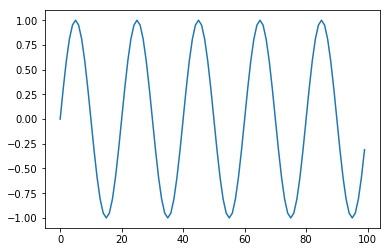

In [11]:
from math import sin
from math import pi
from matplotlib import pyplot

#create sequence
length = 100
freq = 5
sequence = [sin(2 * pi * freq * (i/float(length))) for i in range(length)]
#plot sequence
pyplot.plot(sequence)
pyplot.show()

## Damped Sine Wave

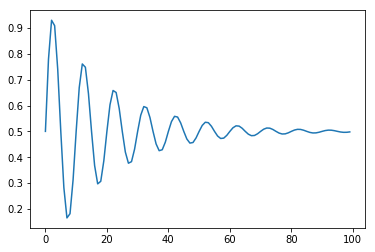

In [12]:
from math import exp
length  =100
period = 10
decay = 0.05
sequence = [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay *  i) for i in range(length)]
pyplot.plot(sequence)
pyplot.show()


In [13]:
from random import uniform
#Generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

#Need to gen various damped sine waves using below random values
#Will split out last n timesteps to use fr predictive training
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        period = randint(10,20)
        decay = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, period, decay)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns, output)
    return X, y



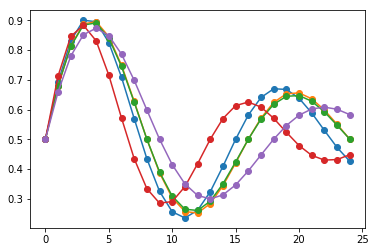

In [14]:
#Test
#Will gen 5 damped sin waves with 20 time steps plus an additional 5 
#timesteps which will be held for test data
X, y = generate_examples(20, 5, 5)
for i in range(len(X)):
    pyplot.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o')
pyplot.show()

In [15]:
#Define and compile our actual model
length = 50
output = 5
memory_cells = 20

model = Sequential()
model.add(LSTM(memory_cells, return_sequences=True, input_shape=(length, 1)))
model.add(LSTM(memory_cells))
model.add(Dense(output))
model.compile(loss='mae', optimizer='adam')#Mean Absolute error
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 50, 20)            1760      
_________________________________________________________________
lstm_8 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Let's fit this using some randomly generated examples
#We will try to ave the model predict the last few timesteps
#of a damped sine wave
#We will set our batch size to 10 so our weights will be updated and
#LSTM memory cell states reset after 10 samples
X, y = generate_examples(length, 10000, output)
model.fit(X, y, batch_size=10, nb_epoch=1)

/Users/krotovd/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1
10000/10000 [==============================] - 89s 9ms/step - loss: 0.0442

In [17]:
#Eval
X, y = generate_examples(length, 1000, output)
loss = model.evaluate(X, y, verbose=0)
print('MAE: %f' % loss)

MAE: 0.019189


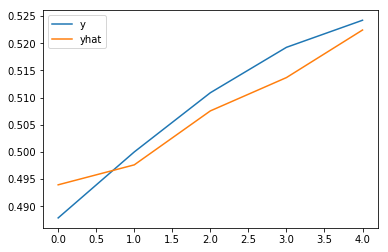

In [18]:
#predict with plots...just because it's prettier
X, y = generate_examples(length, 1, output)
yhat = model.predict(X, verbose=0)
pyplot.plot(y[0], label='y')
pyplot.plot(yhat[0], label='yhat')
pyplot.legend()
pyplot.show()

## CNN LSTM
Good use cases for CN LSTM are:
- Activity Recognition: generating a textual description of an activity demonstrated in a sequence of images.
- Image Description: generating a textual description of a single image.
- Video Description: generating a textual description of a sequence of images.

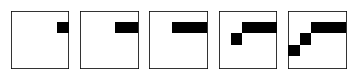

In [19]:
from numpy import zeros
from random import randint
from random import random
from matplotlib import pyplot

def next_frame(last_step, last_frame, column):
    lower = max(0, last_step-1)
    upper = min(last_frame.shape[0]-1, last_step+1)
    #Choose the row index for the next step
    step = randint(lower, upper)
    #copy the prior frame
    frame = last_frame.copy()
    #Add the new step
    frame[step, column] = 1
    return frame, step

#Gen seq of frames of a dot moving across image
def build_frames(size):
    frames = list()
    #Create the first frame
    frame = zeros((size, size))
    step = randint(0, size-1)
    #Decide if we are moving left or right
    right = 1 if random() < 0.5 else 0
    col = 0 if right else size-1
    frame[step, col] = 1
    frames.append(frame)
    #Create all remaining frames
    for i in range(1, size):
        col = i if right else size-1-i
        frame, step = next_frame(step, frame, col)
        frames.append(frame)
    return frames, right

size = 5
frames, right = build_frames(size)
pyplot.figure()
for i in range(size):
    pyplot.subplot(1, size, i+1)
    pyplot.imshow(frames[i], cmap='Greys')
    ax = pyplot.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

In [20]:
def generate_examples(size, n_patterns):
    X, y = list(), list()
    for _ in range(n_patterns):
        frames, right = build_frames(size)
        X.append(frames)
        y.append(right)
    X = array(X).reshape(n_patterns, size, size, size, 1)
    y = array(y).reshape(n_patterns, 1)
    return X, y


In [21]:
import tensorflow as tf

print(tf.__version__)
#print(keras.__version__)

1.8.0


NameError: name 'keras' is not defined

In [45]:
from keras.layers import TimeDistributed, MaxPooling2D, Conv2D, Flatten, RepeatVector
size = 50
model = Sequential()
model.add(TimeDistributed(Conv2D(2, (2,2), activation='relu'),
                         input_shape=(None, size, size, 1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_6 (TimeDist (None, None, 49, 49, 2)   10        
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 24, 24, 2)   0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 1152)        0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                240600    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 240,661
Trainable params: 240,661
Non-trainable params: 0
_________________________________________________________________


In [25]:
X, y = generate_examples(size, 5000)
model.fit(X, y, batch_size=32, epochs=1)

/Users/krotovd/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/1
5000/5000 [==============================] - 49s 10ms/step - loss: 0.1319 - acc: 0.9322

In [26]:
#Time to eval
X, y = generate_examples(size, 100)
loss, acc = model.evaluate(X, y, verbose=0)
print('loss: %f, acc: %f' % (loss, acc*100))

loss: 0.055333, acc: 99.000000


In [28]:
#Predict on new data
X, y = generate_examples(size, 1)
yhat = model.predict_classes(X, verbose=0)
expected = "Right" if y[0]==1 else "Left"
predicted = "Right" if yhat[0]==1 else "Left"
print('Expected: %s, Predicted: %s' % (expected, predicted))

Expected: Right, Predicted: Right


## Encoder-Decoder LSTM

Common Applications of Encoder-Decoder LSTMs
- Machine Translation, e.g. English to French translation of phrases.
- Learning to Execute, e.g. calculate the outcome of small programs.
- Image Captioning, e.g. generating a text description for images.
- Conversational Modeling, e.g. generating answers to textual questions.
- Movement Classification, e.g. generating a sequence of commands from a sequence of gestures.


### Generate Sum Pairs
##### Need to generate random integers and their sums

In [61]:
from random import seed
from random import randint
from math import ceil
from math import log10

# generate lists of random integers and their sum
def random_sum_pairs(n_examples, n_numbers, largest):
    X, y = list(), list()
    for _ in range(n_examples):
        in_pattern = [randint(1, largest) for _ in range(n_numbers)]
        out_pattern = sum(in_pattern)
        X.append(in_pattern)
        y.append(out_pattern)
    return X, y

#convert data to strings
def to_string(X, y, n_numbers, largest):
    max_length = int(n_numbers * ceil(log10(largest+1)) + n_numbers - 1)
    Xstr = list()
    for pattern in X:
        strp = '+'.join([str(n) for n in pattern])
        strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
        Xstr.append(strp)
    max_length = int(ceil(log10(n_numbers * (largest+1))))
    ystr = list()
    for pattern in y:
        strp = str(pattern)
        strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
        ystr.append(strp)
    return Xstr, ystr

# int encode strings
def integer_encode(X, y, alphabet):
    char_to_int = dict((c, i) for i, c in enumerate(alphabet))
    Xenc = list()
    for pattern in X:
        integer_encoded = [char_to_int[char] for char in pattern]
        Xenc.append(integer_encoded)
    yenc = list()
    for pattern in y:
        integer_encoded = [char_to_int[char] for char in pattern]
        yenc.append(integer_encoded)
    return Xenc, yenc

# one hot encode
def one_hot_encode(X, y, max_int):
    Xenc = list()
    for seq in X:
        pattern = list()
        for index in seq:
            vector = [0 for _ in range(max_int)]
            vector[index] = 1
            pattern.append(vector)
        Xenc.append(pattern)
    yenc = list()
    for seq in y:
        pattern = list()
        for index in seq:
            vector = [0 for _ in range(max_int)]
            vector[index] = 1
            pattern.append(vector)
        yenc.append(pattern)
    return Xenc, yenc

seed(1)
n_samples=1
n_numbers=2
largest=10
#generate pairs
X, y = random_sum_pairs(n_samples, n_numbers, largest)
print(X,y)
#convert to strings
X, y = to_string(X, y, n_numbers, largest)
print(X, y)
# integer encode
alphabet = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', ' '] 
X, y = integer_encode(X, y, alphabet)
print(X, y)
# one hot encode
X, y = one_hot_encode(X, y, len(alphabet))
print(X, y)

[[3, 10]] [13]
[' 3+10'] ['13']
[[11, 3, 10, 1, 0]] [[1, 3]]
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]] [[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]]


In [67]:
# generate an encoded dataset
def generate_data(n_samples, n_numbers, largest, alphabet):
    # generate pairs
    X, y = random_sum_pairs(n_samples, n_numbers, largest)
    # convert to strings
    X, y = to_string(X, y, n_numbers, largest)
    # integer encode
    X, y = integer_encode(X, y, alphabet)
    # one hot encode
    X, y = one_hot_encode(X, y, len(alphabet))
    #print(len(X), len(y))
    # return as NumPy arrays
    X, y = array(X), array(y)
    return X, y

In [42]:
# invert encoding
def invert(seq, alphabet):
    int_to_char = dict((i, c) for i, c in enumerate(alphabet))
    strings = list()
    for pattern in seq:
        string = int_to_char[argmax(pattern)]
        strings.append(string)
    return ''.join(strings)

### Define and compile model

In [43]:
# number of math terms
n_terms = 3
#largest value for any single input digit
largest = 10
#Scope of possible symbols for each input or output timestep
alphabet = [str(x) for x in range(10)] + ['+', ' ']
# size of alphabet: (12 for 0-9, + and '')
n_chars = len(alphabet)
#length of encoded input sequence (8 for '10+10+10)
n_in_seq_length = int(n_terms * ceil(log10(largest+1)) + n_terms - 1)
#length of encoded output sequence (2 for '30)
n_out_seq_length = int(ceil(log10(n_terms * (largest + 1))))

In [46]:
#Define LSTM
enc_memory_cells = 75
dec_memory_cells = 50
model = Sequential()
model.add(LSTM(enc_memory_cells, input_shape=(n_in_seq_length, n_chars)))
model.add(RepeatVector(n_out_seq_length))
model.add(LSTM(dec_memory_cells, return_sequences=True))
model.add(TimeDistributed(Dense(n_chars, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 75)                26400     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 2, 75)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 2, 50)             25200     
_________________________________________________________________
time_distributed_9 (TimeDist (None, 2, 12)             612       
Total params: 52,212
Trainable params: 52,212
Non-trainable params: 0
_________________________________________________________________


In [63]:
#Fit the model
X, y = generate_data(75000, n_terms, largest, alphabet)
print(len(X))
print(len(y))

75000 75000
75000
75000


In [65]:
model.fit(X, y, epochs=1, batch_size=32)

Epoch 1/1
75000/75000 [==============================] - 28s 367us/step - loss: 0.7344 - acc: 0.7789

In [68]:
# Lets eval
X, y = generate_data(100, n_terms, largest, alphabet)
loss, acc = model.evaluate(X, y, verbose=0)
print('Loss: %f, Accuracy: %f' % (loss, acc*100))

Loss: 0.161022, Accuracy: 97.500000


### Make some predictions

In [69]:
for _ in range(10):
    X, y = generate_data(1, n_terms, largest, alphabet)
    yhat = model.predict(X, verbose=0)
    in_seq=invert(X[0], alphabet)
    out_seq = invert(y[0], alphabet)
    predicted = invert(yhat[0], alphabet)
    print('%s = %s (expect %s)' % (in_seq, predicted, out_seq))

   7+1+6 = 14 (expect 14)
   7+2+3 = 12 (expect 12)
  10+5+5 = 20 (expect 20)
   1+6+7 = 14 (expect 14)
   6+1+9 = 16 (expect 16)
   2+3+4 =  9 (expect  9)
  10+1+9 = 20 (expect 20)
   8+4+9 = 21 (expect 21)
  10+6+5 = 21 (expect 21)
   1+8+2 = 11 (expect 11)


## Generative LSTM

In [78]:
#Test with generating random rectangles
from random import random
from matplotlib import pyplot
from matplotlib.patches import PathPatch
from matplotlib.path import Path

#Generate a rectangle with random width and height
def random_rectangle():
    width, height = random(), random()
    points = list()
    #bottom left
    points.append([0.0,0.0])
    #bottom right
    points.append([width, 0.0])
    #top right
    points.append([width, height])
    #top left
    points.append([0.0, height])
    return points

def plot_rectangle(rect):
    #Close the rectangle path
    rect.append(rect[0])
    #define path
    codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
    path = Path(rect, codes)
    axis = pyplot.gca()
    patch = PathPatch(path)
    axis.add_patch(patch)
    axis.set_xlim(-0.1, 1.1)
    axis.set_ylim(-0.1, 1.1)
    pyplot.show()
    

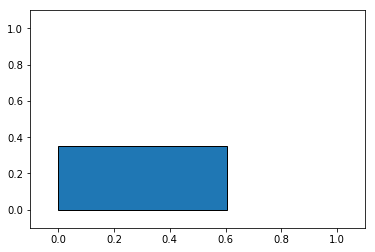

In [81]:
rect = random_rectangle()
plot_rectangle(rect)

In [82]:
# generate input and output sequences for one random rectangle
def get_samples():
    # generate rectangle
    rect = random_rectangle()
    X, y = list(), list()
    # create input output pairs for each coordinate
    for i in range(1, len(rect)):
        X.append(rect[i-1])
        y.append(rect[i])
    # convert input sequence shape to have 1 time step and 2 features
    X, y = array(X), array(y)
    X = X.reshape((X.shape[0], 1, 2))
    return X, y

In [84]:
X, y = get_samples()
for i in range(X.shape[0]):
    print(X[i][0], '=>', y[i])

[0. 0.] => [0.53261199 0.        ]
[0.53261199 0.        ] => [0.53261199 0.28523368]
[0.53261199 0.28523368] => [0.         0.28523368]


In [85]:
model = Sequential()
model.add(LSTM(10, input_shape=(1,2)))
model.add(Dense(2, activation='linear'))
model.compile(loss='mae', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 10)                520       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 22        
Total params: 542
Trainable params: 542
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fit the model
for i in range(25000):
    X, y = get_samples()
    print(i)
    model.fit(X, y, epochs=1, verbose=2, shuffle=False)

0
Epoch 1/1
 - 0s - loss: 0.1255
1
Epoch 1/1
 - 0s - loss: 0.0531
2
Epoch 1/1
 - 0s - loss: 0.0781
3
Epoch 1/1
 - 0s - loss: 0.0479
4
Epoch 1/1
 - 0s - loss: 0.1287
5
Epoch 1/1
 - 0s - loss: 0.0956
6
Epoch 1/1
 - 0s - loss: 0.1235
7
Epoch 1/1
 - 0s - loss: 0.0896
8
Epoch 1/1
 - 0s - loss: 0.0658
9
Epoch 1/1
 - 0s - loss: 0.1061
10
Epoch 1/1
 - 0s - loss: 0.1020
11
Epoch 1/1
 - 0s - loss: 0.0723
12
Epoch 1/1
 - 0s - loss: 0.1130
13
Epoch 1/1
 - 0s - loss: 0.0993
14
Epoch 1/1
 - 0s - loss: 0.0663
15
Epoch 1/1
 - 0s - loss: 0.0195
16
Epoch 1/1
 - 0s - loss: 0.0530
17
Epoch 1/1
 - 0s - loss: 0.0335
18
Epoch 1/1
 - 0s - loss: 0.1329
19
Epoch 1/1
 - 0s - loss: 0.1417
20
Epoch 1/1
 - 0s - loss: 0.0650
21
Epoch 1/1
 - 0s - loss: 0.0841
22
Epoch 1/1
 - 0s - loss: 0.0535
23
Epoch 1/1
 - 0s - loss: 0.1175
24
Epoch 1/1
 - 0s - loss: 0.1156
25
Epoch 1/1
 - 0s - loss: 0.0697
26
Epoch 1/1
 - 0s - loss: 0.0946
27
Epoch 1/1
 - 0s - loss: 0.0595
28
Epoch 1/1
 - 0s - loss: 0.0497
29
Epoch 1/1
 - 0s - los

In [89]:
#Lets try some predictions
# use a fit LSTM model to generate a new rectangle from scratch
def generate_rectangle(model):
    rect = list()
    # use [0,0] to seed the generation process
    last = array([0.0,0.0]).reshape((1, 1, 2))
    rect.append([[y for y in x] for x in last[0]][0])
    # generate the remaining 3 coordinates
    for i in range(3):
        # predict the next coordinate
        yhat = model.predict(last, verbose=0)
        # use this output as input for the next prediction
        last = yhat.reshape((1, 1, 2))
        # store coordinate
        rect.append([[y for y in x] for x in last[0]][0])
    return rect

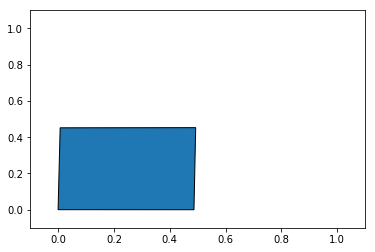

In [96]:
# generate new shapes from scratch
rect = generate_rectangle(model)
plot_rectangle(rect)